## Tutorial for using LSS Mapper on real astronomical data

In this notebook, I will demonstrate how to use a real dataset of galaxies in the nearby Universe, taken from the Sloan Digital Sky Survey (SDSS), to generate the Voronoi Tessellation diagram and the Minimum Spanning Tree. Furthermore, I will show how we can leverage the two techniques to map the Large Scale Structure (LSS) traced by galaxies.

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from _VT import VT
from _MST import MST
from plot_both_cumul_dist import plot_both_cumul_dist
from plot_both_MST import plot_both_MST

%matplotlib inline

## Read in the csv file with galaxies in the local Universe

In [3]:
df = pd.read_csv('data/df1.csv')

## Initialize Voronoi Tessellation, and get cell densities

In [4]:
V = VT(df)
vor = V.get_vt(df)
V.celldensity = V.get_celldens(vor)

### Plot the Voronoi diagram

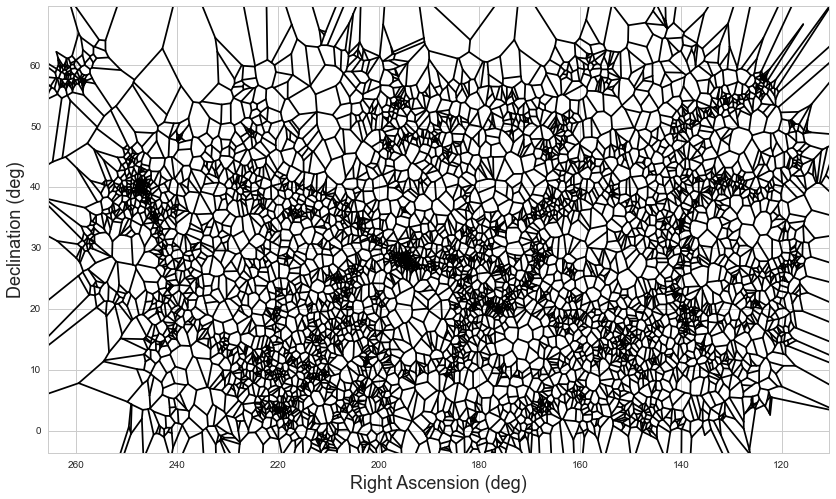

In [5]:
V.plot_voronoi(vor, xlim=(vor.max_bound[0], vor.min_bound[0]), 
               ylim=(vor.min_bound[1], vor.max_bound[1]), savefigure=True, 
               figname="VT_galaxies.png")

## Initialize the Minimum Spanning Tree - here I've selected a few parameters which are pretty good at selecting clusters and groups in this data set

In [55]:
mst_clust = MST(df, 0.4, 6, 250)

## Plot histograms and cumulative distributions of the VT cell densities and the MST branch lengths

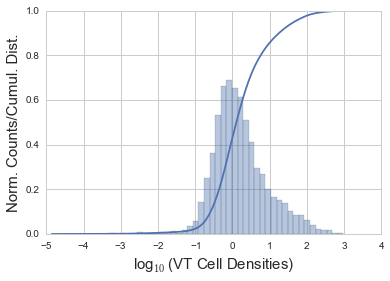

In [56]:
V.plot_vt_cumul(V, savefigure=True)

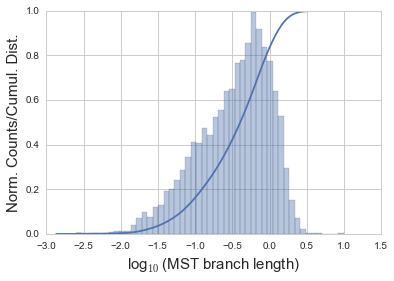

In [57]:
mst_clust.plot_mst_cumul(savefigure=True)

Compare cumulative distribution of VT cells to MST branch lengths

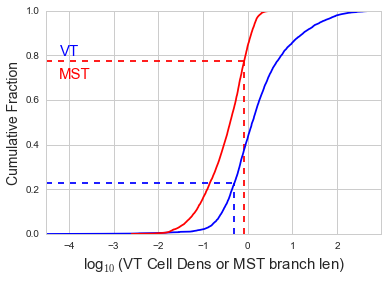

In [58]:
plot_both_cumul_dist(np.asarray(V.celldensity), 
                     mst_clust.seps, dens_thresh=[-0.3], savefigure=True, 
                     figname="both_cumulative_dist_1.png")

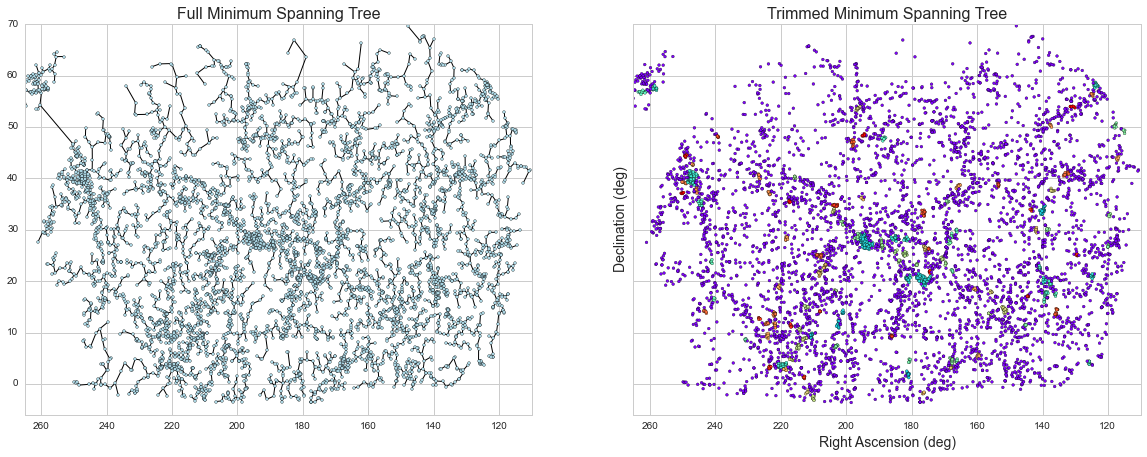

In [59]:
mst_clust.plot_mst(mst_clust.set_mst, xlim=(265, 110), ylim=(-6, 70), savefigure=True, 
                   figname="MST_plots_clusters.png")

In [11]:
mst_fil = MST(df, 1.4, 6, 250)

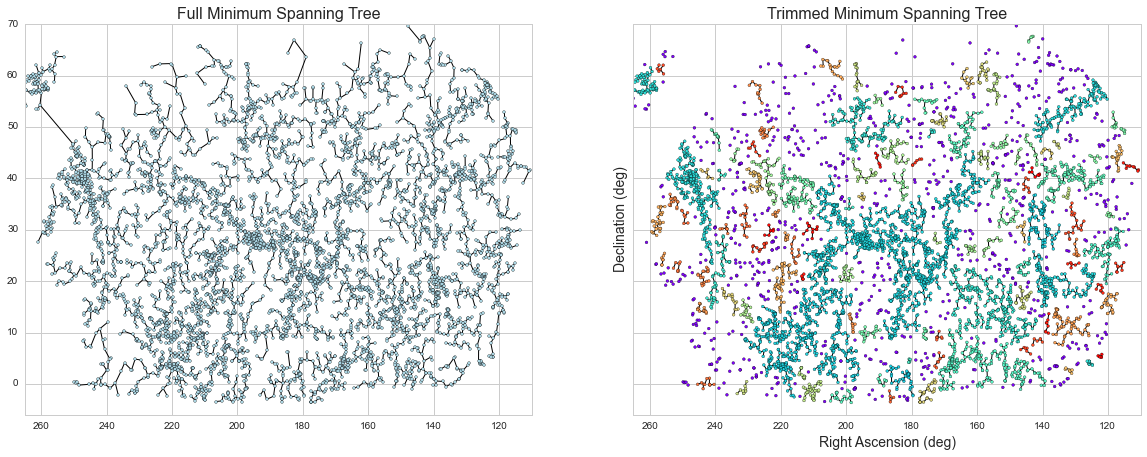

In [12]:
mst_fil.plot_mst(mst_fil.set_mst, xlim=(265, 110), ylim=(-6, 70), savefigure=True, 
                 figname="MST_plots_filaments.png")

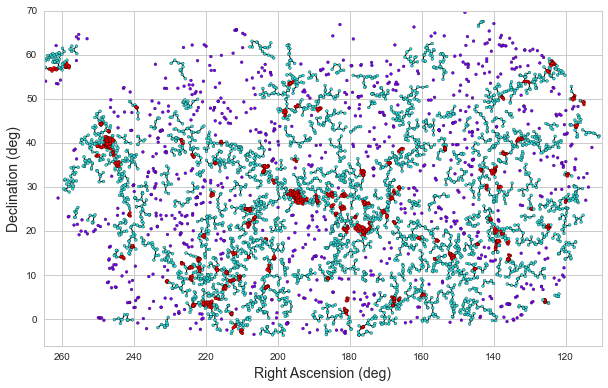

In [60]:
plot_both_MST(mst_fil.set_mst, mst_fil.labels, mst_clust.labels, 
              xlim=(265, 110), ylim=(-6, 70), savefigure=True, 
              figname="MST_combined.png")

In [61]:
celldens_all = np.asarray(V.celldensity)

In [71]:
df_void = df[mst_fil.labels==-1]
df_fil = df[(mst_clust.labels==-1) & (mst_fil.labels>-1)]
df_clust = df[mst_clust.labels>-1]

In [62]:
celldens_void = celldens_all[mst_fil.labels==-1]
celldens_fil = celldens_all[(mst_clust.labels==-1) & (mst_fil.labels>-1)]
celldens_clust = celldens_all[mst_clust.labels>-1]

In [63]:
celldens_void_good = celldens_void[celldens_void > -99]
celldens_fil_good = celldens_fil[celldens_fil > -99]
celldens_clust_good = celldens_clust[celldens_clust > -99]

In [72]:
df_void

,Unnamed: 0,photoid,specid,ra,dec,z,dl,logstmass,logsfr,envflag
864,3611,1237661356998197278,1371521504088451072,155.132240,43.021595,0.022174,96.586,10.7941,-3.3234,1
902,3649,1237661872935075892,1535859465683757056,167.858222,43.907091,0.021291,92.679,10.5939,-3.2417,1
938,3685,1237663915727323148,2003048004109494272,117.734265,48.312791,0.021526,93.718,10.2742,-4.0801,1
940,3687,1237663787416617096,2103233583329077248,116.603951,48.332846,0.021746,94.690,10.1957,-0.6661,1
1030,3777,1237658203425472585,1058353653808654336,145.989366,41.687324,0.017151,74.426,10.2731,-3.1085,1
1031,3778,1237658205572825302,1058460856192362496,144.438187,43.100665,0.016945,73.516,10.3065,-4.0387,1
1032,3779,1237657873794138115,1058506211047008256,145.948214,42.473603,0.018008,78.192,10.3097,-4.1488,1
1033,3780,1237658204499476484,1058507860314449920,145.987281,42.672476,0.017697,76.826,10.2760,-0.8899,1
1034,3781,1237657873794138136,1058510059337705472,145.996792,42.432967,0.016962,73.593,10.5812,-3.7935,1
1036,3783,1237658203962736821,1059530681660499968,146.767860,42.521184,0.017712,76.889,10.0840,-1.1511,1


(-5, 2)

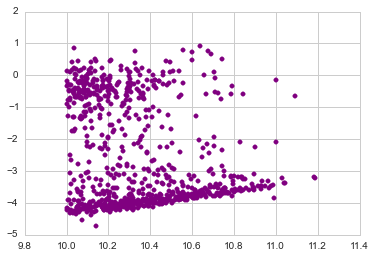

In [79]:
plt.scatter(df_void.logstmass, df_void.logsfr, color='purple')
plt.ylim(-5, 2)

(-5, 2)

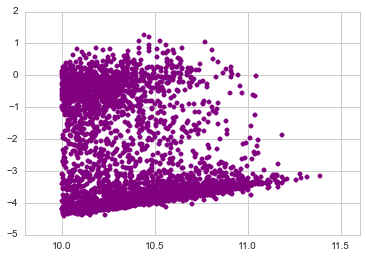

In [80]:
plt.scatter(df_fil.logstmass, df_fil.logsfr, color='purple')
plt.ylim(-5, 2)

(-5, 2)

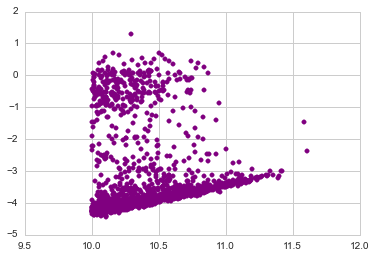

In [81]:
plt.scatter(df_clust.logstmass, df_clust.logsfr, color='purple')
plt.ylim(-5, 2)

In [64]:
len(celldens_void_good)

797

In [65]:
np.median(celldens_void_good)

0.49552188531268865

In [66]:
np.median(celldens_fil_good)

0.11879574576154835

In [67]:
np.median(celldens_clust_good)

-0.089965882722282231

In [68]:
len(celldens_fil_good)

3909

In [69]:
len(celldens_clust_good)

1647

(-2, 4)

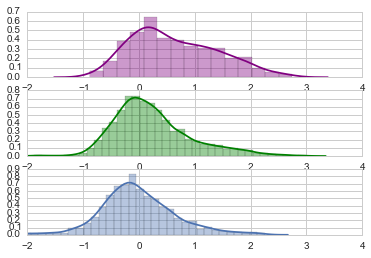

In [70]:
plt.subplot(3,1,1)
sns.distplot(celldens_void_good, color='purple')
plt.xlim(-2, 4)
plt.subplot(3,1,2)
sns.distplot(celldens_fil_good, color='green')
plt.xlim(-2, 4)
plt.subplot(3,1,3)
sns.distplot(celldens_clust_good)
plt.xlim(-2, 4)

(-2, 5)

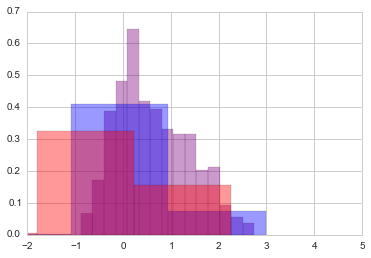

In [24]:
fig, ax = plt.subplots()
cols = ['purple', 'blue', 'red']
the_celldens = [celldens_void, celldens_fil, celldens_clust]
for a in range(3):
    sns.distplot(the_celldens[a], ax=ax, kde=False, norm_hist=True, color=cols[a])
ax.set_xlim([-2, 5])

In [27]:
min([min(the_celldens[0]), min(the_celldens[1]), min(the_celldens[2])])

-99.0